# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

In [1]:
#Importo las librerias que voy a utilizar para trabajar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# PARTE TRAIN

In [2]:
#Importo el dataset proporcionado
review_trainor=pd.read_json(r"C:\Users\freib\Desktop\dataset_es_train.json", lines=True)
review_trainor

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes
...,...,...,...,...,...,...,...,...
199995,es_0715276,product_es_0317036,reviewer_es_0643604,5,Mando funciona perfectamente y cumple con toda...,Tal y como se describe,es,electronics
199996,es_0085190,product_es_0622919,reviewer_es_0466173,5,"Compré la batería con cierta reticencia, pero ...",Funciona perfectamente,es,electronics
199997,es_0484496,product_es_0358101,reviewer_es_0330744,5,Buena calidad. Satisfecha con la compra.,Buena calidad.,es,apparel
199998,es_0930141,product_es_0788855,reviewer_es_0694290,5,Perfecto para el cumple de mi hijo,Recomendado,es,toy


Durante el proyecto voy a trabajar con esta modalidad de dataset, tanto de train como para test, el cual trata acerca de reseñas que reciben productos en amazon. El mismo detalla: el id de la persona que deja la reseña, el id del producto, las estrellas de la review, el id de la review, la reseña tanto en su titulo como en su cuerpo y a que categoria pertenece el producto al que refiere. Apartir de esto, mi objetivo es generar un odelo que pueda recibir una reseña y predecir que cantidad de estrellas se le asignan.

*Normalizacion del texto*

In [3]:
import itertools
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\freib\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\freib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [4]:
#Voy a empezar con la normalizacion de mi texto para poder hacer un buen analisis de los datos
# Importamos esta libreria que nos permite reemplzar caracteres
import re

# Importamos la función que nos permite Stemmizar de nltk y definimos el stemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('spanish')


# Traemos nuevamente las stopwords
stopwords = nltk.corpus.stopwords.words('spanish')


In [5]:
# Recorremos todos los titulos y le vamos aplicando la Normalizacion y luega el Stemming a cada uno

title_stem=[]
for titular in review_trainor.review_title:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    titular=re.sub("[^a-zA-Z]"," ",str(titular))
    # Pasamos todo a minúsculas
    titular=titular.lower()
    # Tokenizamos para separar las palabras del titular
    titular=nltk.word_tokenize(titular)
    # Eliminamos las palabras de menos de 3 letras
    titular = [palabra for palabra in titular if len(palabra)>3]
    # Sacamos las Stopwords
    titular = [palabra for palabra in titular if not palabra in stopwords]
    
    ## Hasta acá Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    titular=[stemmer.stem(palabra) for palabra in titular]
    # Por ultimo volvemos a unir el titular
    titular=" ".join(titular)
    
    # Vamos armando una lista con todos los titulares
    title_stem.append(titular)
    #dataset["titular_normalizado"] = titular_list

In [6]:
# Recorremos todos los bodys y le vamos aplicando la Normalizacion y luega el Stemming a cada uno
body_stem=[]
for titular in review_trainor.review_body:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    titular=re.sub("[^a-zA-Z]"," ",str(titular))
    # Pasamos todo a minúsculas
    titular=titular.lower()
    # Tokenizamos para separar las palabras del titular
    titular=nltk.word_tokenize(titular)
    # Eliminamos las palabras de menos de 3 letras
    titular = [palabra for palabra in titular if len(palabra)>3]
    # Sacamos las Stopwords
    titular = [palabra for palabra in titular if not palabra in stopwords]
    
    ## Hasta acá Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    titular=[stemmer.stem(palabra) for palabra in titular]
    # Por ultimo volvemos a unir el titular
    titular=" ".join(titular)
    
    # Vamos armando una lista con todos los titulares
    body_stem.append(titular)
    #dataset["titular_normalizado"] = titular_list

In [7]:
review_trainor["title_stem"] = title_stem
review_trainor.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,title_stem
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics,television nev
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics,diner tir basur compr
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore,sol lleg unid oblig compr
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless,product recib
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes,devuelt


In [8]:
review_trainor["body_stem"] = body_stem
review_trainor.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,title_stem,body_stem
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics,television nev,buen pantall men mes recib respuest fabric
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics,diner tir basur compr,horribl compr sab ingl inform tic despu hor ca...
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore,sol lleg unid oblig compr,oblig compr unidad lleg sol form reclam autent...
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless,product recib,entro descalific vendedor sol pued dec tras me...
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes,devuelt,lleg tard tall equivoc


In [9]:
review_train=pd.concat([review_trainor.stars,review_trainor.body_stem,review_trainor.title_stem,review_trainor.product_category],axis=1)
review_train

,stars,body_stem,title_stem,product_category
0,1,buen pantall men mes recib respuest fabric,television nev,electronics
1,1,horribl compr sab ingl inform tic despu hor ca...,diner tir basur compr,electronics
2,1,oblig compr unidad lleg sol form reclam autent...,sol lleg unid oblig compr,drugstore
3,1,entro descalific vendedor sol pued dec tras me...,product recib,wireless
4,1,lleg tard tall equivoc,devuelt,shoes
...,...,...,...,...
199995,5,mand funcion perfect cumpl tod funcion origina...,describ,electronics
199996,5,compr bat ciert reticent result instal destorn...,funcion perfect,electronics
199997,5,buen calid satisfech compr,buen calid,apparel
199998,5,perfect cumpl hij,recomend,toy


### ANALISIS DE LOS DATOS

#### MALAS CALIFICACIONES

In [10]:
#Selecciono las reviews con 3 o menos estrellas como malas
malasreviewsdata = review_train[review_train.stars<=3]
malasreviewsdata

,stars,body_stem,title_stem,product_category
0,1,buen pantall men mes recib respuest fabric,television nev,electronics
1,1,horribl compr sab ingl inform tic despu hor ca...,diner tir basur compr,electronics
2,1,oblig compr unidad lleg sol form reclam autent...,sol lleg unid oblig compr,drugstore
3,1,entro descalific vendedor sol pued dec tras me...,product recib,wireless
4,1,lleg tard tall equivoc,devuelt,shoes
...,...,...,...,...
119995,3,consol retr simp tic dentr verd dej des cantid...,recomend preci actual,video_games
119996,3,pues gaf demasi anchas gust cristal bien bici ...,buen,sports
119997,3,preci orden bonit funcion lleg perfect condici...,buen bonit barat windows activ,pc
119998,3,product esper recib indic conform seguimient i...,seguimient mal,office_product


In [11]:
todasmalasreviews = []
for i in range(malasreviewsdata.shape[0]):
    titular = malasreviewsdata.iloc[i].title_stem
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    titular = [word for word in titular if word not in stopwords]
    

    todasmalasreviews.append(titular)

In [12]:
malasreview_lista = list(itertools.chain(*todasmalasreviews))
malasreview_lista[0:10]

['television',
 'nev',
 'diner',
 'tir',
 'basur',
 'compr',
 'sol',
 'lleg',
 'unid',
 'oblig']

In [13]:
#Calculo cuales son las palabras que mas aparecen a ver si puedo obtener algo que sea relevante
freq_malas = nltk.FreqDist(malasreview_lista)
freq_malas

FreqDist({'calid': 7882, 'bien': 5879, 'mal': 5762, 'buen': 5432, 'funcion': 4175, 'product': 3821, 'lleg': 3545, 'pequ': 2885, 'preci': 2837, 'compr': 2643, ...})

In [14]:
df_malas = pd.DataFrame(list(freq_malas.items()), columns = ["Word","Frequency"])
df_malas.sort_values('Frequency',ascending=False, inplace = True)
df_malas.reset_index(drop = True, inplace=True)
df_malas

,Word,Frequency
0,calid,7882
1,bien,5879
2,mal,5762
3,buen,5432
4,funcion,4175
...,...,...
9434,xel,1
9435,pteci,1
9436,katty,1
9437,ciel,1


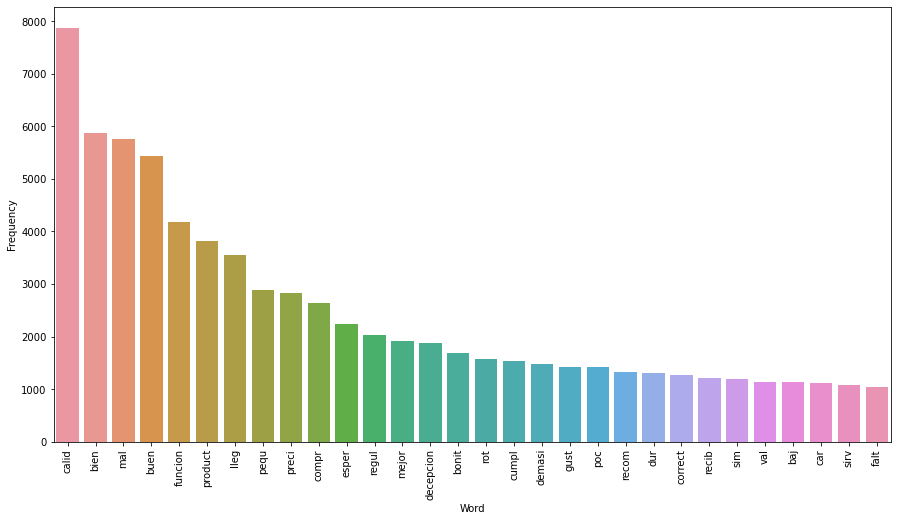

In [15]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_malas.iloc[:30].Word, y = df_malas.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

Podemos observar que estas palabras son las mas asociadas a las malas reseñas

Apartir de este recuento de palabras para el titulo de las reseñas podemos deducir que la mayoria de las malas calificaciones se deben a la calidad de los productos ya que como se puede ver en el grafico es la palabra que mas aparece. Tambien viendo las otras palabras podriamos hablar de sentimientos como decepcion y problemas en la funcionalidad del producto y tambien problemas en si mismo.

In [16]:
todasmalasreviewsbody = []
for i in range(malasreviewsdata.shape[0]):
    titular = malasreviewsdata.iloc[i].body_stem
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    titular = [word for word in titular if word not in stopwords]
    

    todasmalasreviewsbody.append(titular)
malasreview_listabody = list(itertools.chain(*todasmalasreviewsbody))
freq_malasbody = nltk.FreqDist(malasreview_listabody)
df_malasbody = pd.DataFrame(list(freq_malasbody.items()), columns = ["Word","Frequency"])
df_malasbody.sort_values('Frequency',ascending=False, inplace = True)
df_malasbody.reset_index(drop = True, inplace=True)
df_malasbody

,Word,Frequency
0,bien,28071
1,compr,19959
2,lleg,18350
3,product,16857
4,calid,16194
...,...,...
17614,bailote,1
17615,feeling,1
17616,cursis,1
17617,inkjet,1


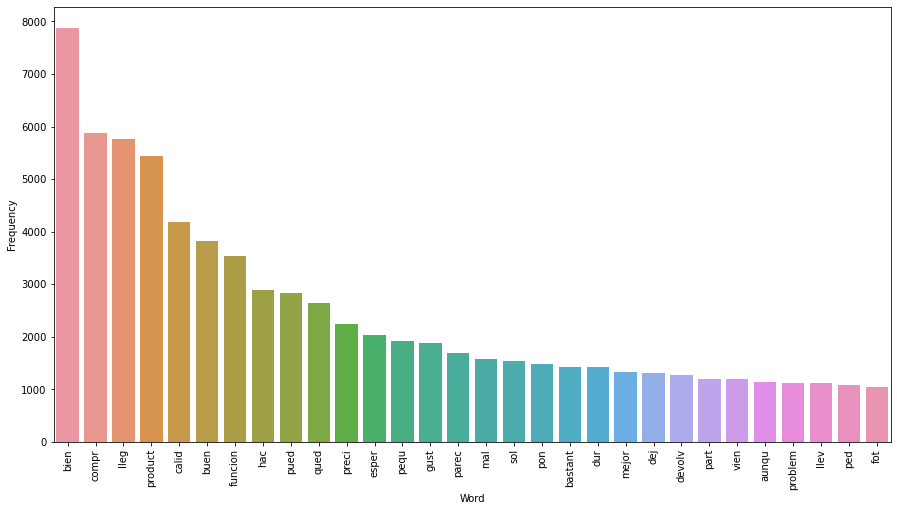

In [17]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_malasbody.iloc[:30].Word, y = df_malas.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

Apartir del grafico de la frcuencia de palabras pero en este caso en la parte body de la review podemos ver algunas similitudes con el de los titulos como calidad, funcionalidad y producto. Como algo novedoso podemos identificar que la palabra bien es la mas utilizada en los bodys de las malas reseñas y que nuevos problemas que podemos identificar pueden estra relcionados con la palabra comprar y llegar. Podriamos asociarlos con problemas como llegada en mal estado o demoras por dar alguns ejemplos

#### BUENAS CALIFICACIONES

In [18]:
#Selecciono las reviews con mas de 3 estrellas como buenas
buenasreviewsdata = review_train[review_train.stars>3]
buenasreviewsdata

,stars,body_stem,title_stem,product_category
120000,4,buen pint ver result,calid,sports
120001,4,entreg pid siempr falt factur,falt factur,wireless
120002,4,bien pid,buen,pc
120003,4,qued bien material durader tam perfect,material durader,home
120004,4,genial aunqu huel pegament,buen,personal_care_appliances
...,...,...,...,...
199995,5,mand funcion perfect cumpl tod funcion origina...,describ,electronics
199996,5,compr bat ciert reticent result instal destorn...,funcion perfect,electronics
199997,5,buen calid satisfech compr,buen calid,apparel
199998,5,perfect cumpl hij,recomend,toy


In [19]:
todasbuenasreviews = []
for i in range(buenasreviewsdata.shape[0]):
    titular = malasreviewsdata.iloc[i].body_stem
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    titular = [word for word in titular if word not in stopwords]
    

    todasbuenasreviews.append(titular)

In [20]:
buenasreview_lista = list(itertools.chain(*todasbuenasreviews))
freq_buenas = nltk.FreqDist(buenasreview_lista)
df_buenas = pd.DataFrame(list(freq_buenas.items()), columns = ["Word","Frequency"])
df_buenas.sort_values('Frequency',ascending=False, inplace = True)
df_buenas.reset_index(drop = True, inplace=True)
df_buenas

,Word,Frequency
0,compr,15379
1,lleg,14379
2,bien,14108
3,product,12635
4,funcion,10793
...,...,...
15181,corrosion,1
15182,lvel,1
15183,jarab,1
15184,origami,1


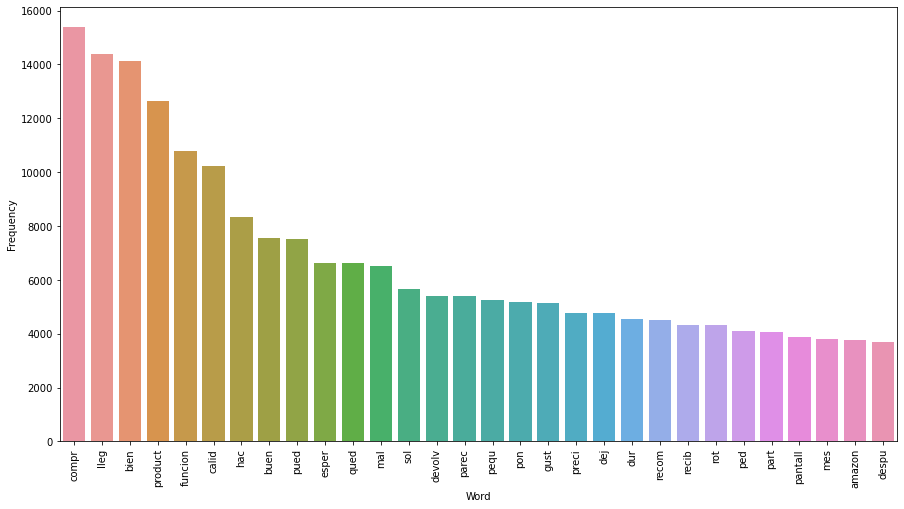

In [21]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_buenas.iloc[:30].Word, y = df_buenas.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

En este caso para no ser tan repetitivo, unicamente mostrare estos datos sobre el body de la review y no sobre el title. Podemos obserar que nuevamente, como en las malas reviews, aparecen palabras como compra, producto, funcionamiento y calidad. Podriamos pensar que esto es un error y que estos datos no nos estan brindado informacion pero a mi manera de verlo no es asi. Apartir de esto podemos ver que, primero que nada, las palabras de connotacion positiva en este caso aparecen casi el doble de veces en las buenas reviews que en las malas reviews, lo cual dice mucho. Pero por otro lado y mas importante, podriamos pensar y darnos cuenta que apartir de estos hallazgos encontramos que usualmente el consumidor de amazon a la hora de hacer una reseña en lo que mas se fija es en la calidad, el funcionamiento y la llegada de su producto por ejemplo. Luego a la hora de modelar esto lo podriamos pensar como un prolema pero hay que pensar que todas estas palabras toman un significado distinto dependiendo de con que otras palabras estan acompañadas.

#### CATEGORIAS

In [22]:
#Calculo la cantidad de categorias de productos que tiene el dataset
cantidad=review_train["product_category"].value_counts()
print(cantidad)

home                        26962
wireless                    25886
toy                         13647
sports                      13189
pc                          11191
home_improvement            10879
electronics                 10385
beauty                       7337
automotive                   7143
kitchen                      6695
apparel                      5737
drugstore                    5513
book                         5264
furniture                    5229
baby_product                 4881
office_product               4771
lawn_and_garden              4237
other                        3937
pet_products                 3713
personal_care_appliances     3573
luggage                      3328
camera                       3029
shoes                        2754
digital_ebook_purchase       1843
video_games                  1733
jewelry                      1598
musical_instruments          1530
watch                        1490
industrial_supplies          1482
grocery       

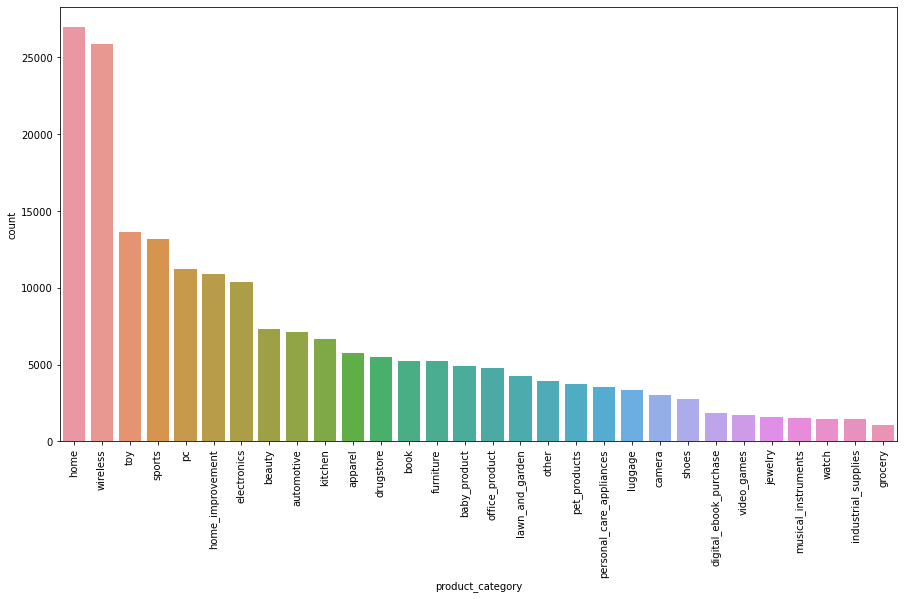

In [23]:
#Grafico el total de cantidad de reviews por cada categoria
plt.figure(figsize = (15,8))
sns.countplot(data = review_train, x = "product_category",order =review_train ['product_category'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [24]:
#Calculo la cantidad de malas reviews que tiene cada producto
cantidad_mala=malasreviewsdata["product_category"].value_counts()
cantidad_mala

wireless                    16764
home                        16410
toy                          8181
sports                       7817
electronics                  6492
pc                           6357
home_improvement             6337
beauty                       4612
automotive                   4389
kitchen                      3934
apparel                      3678
drugstore                    3306
furniture                    3081
baby_product                 2851
lawn_and_garden              2800
office_product               2749
book                         2553
other                        2280
pet_products                 2272
personal_care_appliances     2110
camera                       1704
luggage                      1685
shoes                        1560
jewelry                      1018
video_games                   965
digital_ebook_purchase        943
watch                         881
industrial_supplies           872
musical_instruments           806
grocery       

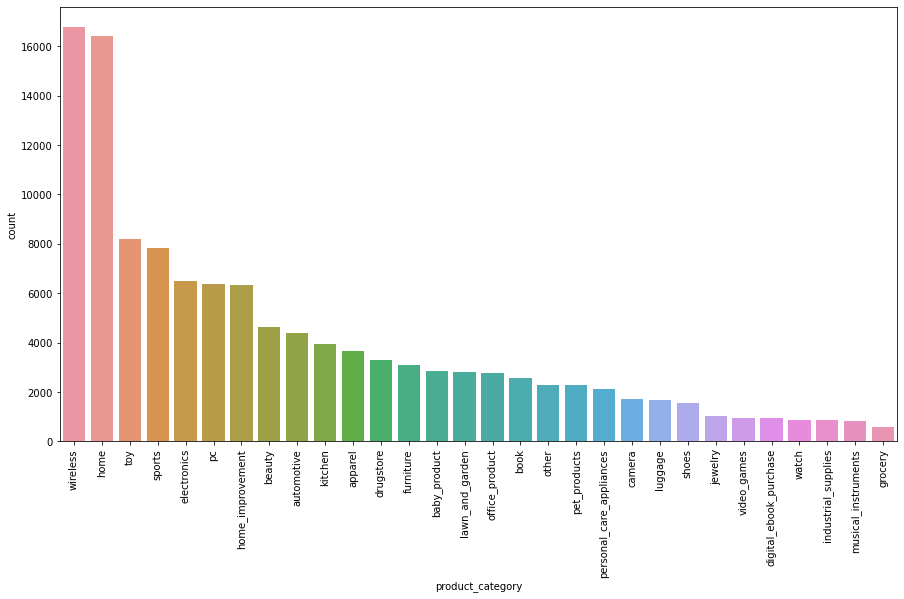

In [25]:
#Grafico la cantidad de malas reviews que tiene cada producto
plt.figure(figsize = (15,8))
sns.countplot(data = malasreviewsdata, x = "product_category",order =malasreviewsdata ['product_category'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [26]:
#Calculo la cantidad de buenas reviews que tiene cada producto
cantidad_buena=buenasreviewsdata["product_category"].value_counts()
cantidad_buena

home                        10552
wireless                     9122
toy                          5466
sports                       5372
pc                           4834
home_improvement             4542
electronics                  3893
kitchen                      2761
automotive                   2754
beauty                       2725
book                         2711
drugstore                    2207
furniture                    2148
apparel                      2059
baby_product                 2030
office_product               2022
other                        1657
luggage                      1643
personal_care_appliances     1463
pet_products                 1441
lawn_and_garden              1437
camera                       1325
shoes                        1194
digital_ebook_purchase        900
video_games                   768
musical_instruments           724
industrial_supplies           610
watch                         609
jewelry                       580
grocery       

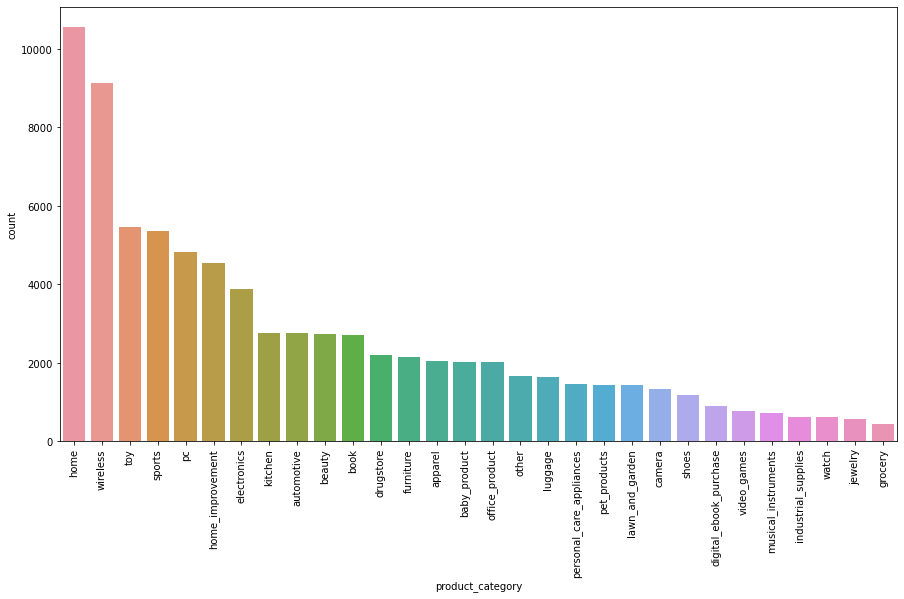

In [27]:
#Grafico la cantidad de buenas reviews que tiene cada producto
plt.figure(figsize = (15,8))
sns.countplot(data = buenasreviewsdata, x = "product_category",order =buenasreviewsdata ['product_category'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [28]:
df_cantidad=pd.DataFrame(cantidad.items(), columns = ["Producto","Cantidad"])
df_buenas=pd.DataFrame(cantidad_buena.items(),columns = ["Producto","Cantidad_buenas"])
df_malas=pd.DataFrame(cantidad_mala.items(),columns = ["Producto","Cantidad_malas"])

In [29]:
tasa_positivas=pd.merge(df_cantidad,df_buenas, on='Producto')
porcentaje=tasa_positivas["Cantidad_buenas"]/tasa_positivas["Cantidad"]*100
positivo2=pd.concat([tasa_positivas.Producto,tasa_positivas.Cantidad,tasa_positivas.Cantidad_buenas,porcentaje],axis=1)                   
positivo=positivo2.rename(index=str, columns={0:"Porcentaje"})
positivo = positivo.sort_values('Porcentaje',ascending=True)
positivo

,Producto,Cantidad,Cantidad_buenas,Porcentaje
16,lawn_and_garden,4237,1437,33.915506
1,wireless,25886,9122,35.239125
10,apparel,5737,2059,35.889838
25,jewelry,1598,580,36.295369
7,beauty,7337,2725,37.140521
6,electronics,10385,3893,37.486760
8,automotive,7143,2754,38.555229
18,pet_products,3713,1441,38.809588
0,home,26962,10552,39.136563
11,drugstore,5513,2207,40.032650


Visualizando este dataset que apartir de los datos dados confecciones, se puede observar de menor a mayor el porcentaje y relacion que hay entre la cantidad de reseñas que tiene cada categoria y la cantidad que son positivas. Es decir, mirando este DataSet podemos observar en cuales de las categorias hay que trabajar mas para que los clientes esten mas satisfechos. Ademas, cabe aclarar que los porcentajes no son tan altos porque se utilizo un criterio que propone que unicamente las reseñas con 4 o 5 estrellas son calificadas como buenas

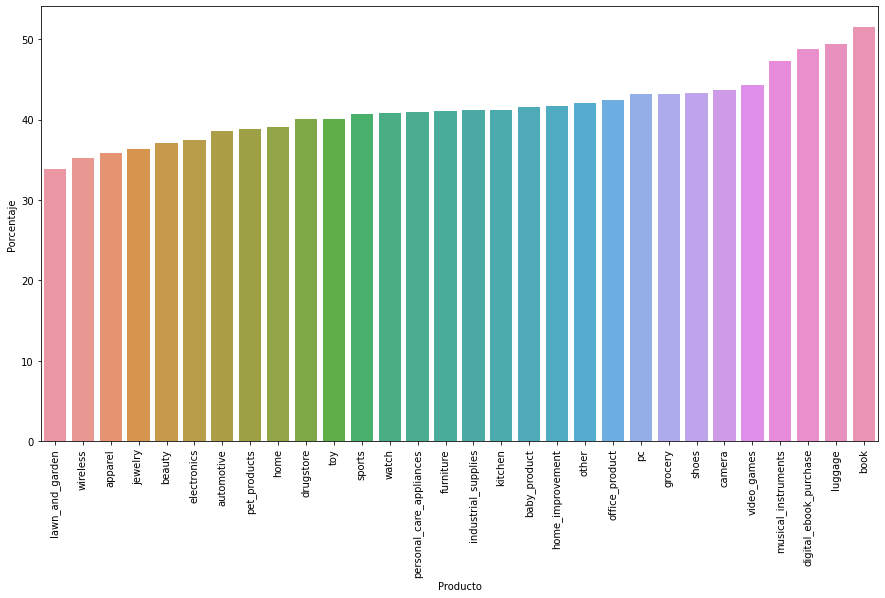

In [30]:
plt.figure(figsize = (15,8))
sns.barplot(data = positivo, x = "Producto",y="Porcentaje")
plt.xticks(rotation=90)
plt.show()

### MODELADO


In [10]:

body_and_title=review_train["title_stem"]+ ' '+review_train["body_stem"]

In [11]:
review_train["body_and_title"] = body_and_title
review_train

,stars,body_stem,title_stem,product_category,body_and_title
0,1,buen pantall men mes recib respuest fabric,television nev,electronics,television nev buen pantall men mes recib resp...
1,1,horribl compr sab ingl inform tic despu hor ca...,diner tir basur compr,electronics,diner tir basur compr horribl compr sab ingl i...
2,1,oblig compr unidad lleg sol form reclam autent...,sol lleg unid oblig compr,drugstore,sol lleg unid oblig compr oblig compr unidad l...
3,1,entro descalific vendedor sol pued dec tras me...,product recib,wireless,product recib entro descalific vendedor sol pu...
4,1,lleg tard tall equivoc,devuelt,shoes,devuelt lleg tard tall equivoc
...,...,...,...,...,...
199995,5,mand funcion perfect cumpl tod funcion origina...,describ,electronics,describ mand funcion perfect cumpl tod funcion...
199996,5,compr bat ciert reticent result instal destorn...,funcion perfect,electronics,funcion perfect compr bat ciert reticent resul...
199997,5,buen calid satisfech compr,buen calid,apparel,buen calid buen calid satisfech compr
199998,5,perfect cumpl hij,recomend,toy,recomend perfect cumpl hij


### Modelo Benchmark

In [12]:
# Tomamso la lista de palabras y el vector que nos dice la puntuacion de la review
list_titles = list(review_train["title_stem"].values)
cant_stars = review_train['stars'].values

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 1000 palabras con mas frecuencia en todo el corpus para generar los vectores
# Es decir que cada instancia tendrá 1000 features
cou_vec_bench=CountVectorizer(max_features=1000) 

In [14]:
matriz_bench = cou_vec_bench.fit_transform(list_titles)

# Tomamos las palabras
all_words_bench = cou_vec_bench.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words_bench[0:50])

50 palabras mas usadas:  ['abiert', 'abrig', 'absolut', 'aburr', 'acab', 'accesori', 'aceit', 'acept', 'acer', 'acert', 'aciert', 'aconsej', 'acopl', 'acord', 'activ', 'adapt', 'adecu', 'adherent', 'adhes', 'adhier', 'afeit', 'agarr', 'agend', 'agrad', 'agu', 'aguant', 'agujer', 'ahor', 'ahorr', 'air', 'ajust', 'albert', 'alex', 'alfombr', 'algun', 'almoh', 'alta', 'altavoz', 'altern', 'alto', 'altur', 'alumbr', 'amarill', 'amazon', 'ampli', 'ancho', 'angel', 'anill', 'anten', 'anterior']


In [15]:
#Genero un modelo benchmark con una cantidad y profunidad moderada
X_benchmark=matriz_bench.toarray()
y_benchmark=cant_stars
#Hago el train/test split 
from sklearn.model_selection import train_test_split
X_train_benchmark, X_test_benchmark, y_train_benchmark, y_test_benchmark =train_test_split(X_benchmark, y_benchmark, test_size=0.3,random_state=42)

In [16]:
from sklearn.ensemble import RandomForestRegressor
regresor_bench = RandomForestRegressor(max_depth=7, random_state = 42)
regresor_bench.fit(X_train_benchmark,y_train_benchmark)

RandomForestRegressor(max_depth=7, random_state=42)

In [17]:
#Calculo su efectividad en train
y_pred_benchmark=regresor_bench.predict(X_train_benchmark)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train_benchmark,y_pred_benchmark))

1.2733036963678255

In [18]:
#Calculo su efectividad en test
y_predbench_test=regresor_bench.predict(X_test_benchmark)
np.sqrt(mean_squared_error(y_test_benchmark,y_predbench_test))

1.277870865551516

Viendo este modelo benchmark podemos observar que no tiene tan buen rendimiento pero que tiene muy poca diferencia entre el conjunto de train y de test por lo que entendemos que generaliza bien los datos y no aprende únicamente de los que le estamos dando como conjunto train. Podemos entender que tiene un bajo rendimiento porque es un modelo bastante general y básico por lo que es menos específico.

### Unicamenete con title

In [33]:
# Tomamso la lista de palabras y el vector que nos dice la puntuacion de la review
list_titles = list(review_train["title_stem"].values)
cant_stars = review_train['stars'].values

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 1500 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=1500

# Es decir que cada instancia tendrá 1500 features
cou_vec_title=CountVectorizer(max_features=max_features) 

In [35]:
matriz_titles = cou_vec_title.fit_transform(list_titles)

# Tomamos las palabras
all_words = cou_vec_title.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['abaj', 'abiert', 'abre', 'abrig', 'abrir', 'absolut', 'aburr', 'acab', 'accesori', 'aceit', 'acept', 'acer', 'acert', 'aciert', 'acolch', 'aconsej', 'acopl', 'acord', 'activ', 'actualiz', 'adapt', 'adaptaci', 'adecu', 'adem', 'adherent', 'adhes', 'adhier', 'ador', 'adorn', 'adult', 'afeit', 'afil', 'agarr', 'agend', 'agrad', 'agridulc', 'agu', 'aguant', 'aguj', 'agujer', 'ahor', 'ahorr', 'air', 'aisl', 'ajust', 'alarm', 'albert', 'alcanc', 'alejandr', 'alergi']


In [63]:
x_train_title = matriz_titles.toarray()
y_train_title = cant_stars
from sklearn.ensemble import RandomForestRegressor
regresor_title = RandomForestRegressor(max_depth=10, random_state = 42)
regresor_title.fit(x_train_title,y_train_title)

RandomForestRegressor(max_depth=10, random_state=42)

In [64]:
y_train_pred_title = regresor_title.predict(x_train_title)
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_train_title,y_train_pred_title)))

1.2525927822788654


### Unicamente con body

In [33]:
# Tomamso la lista de palabras y el vector que nos dice la puntuacion de la review
list_body = list(review_train["body_stem"].values)
cant_stars_body = review_train['stars'].values

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 1500 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=1500

# Es decir que cada instancia tendrá 1000 features
cou_vec_body=CountVectorizer(max_features=max_features) 

In [35]:
matriz_body = cou_vec_body.fit_transform(list_body)

# Tomamos las palabras
all_words = cou_vec_body.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['abaj', 'abiert', 'abre', 'abrig', 'abrir', 'abrirl', 'absolut', 'absorb', 'aburr', 'acab', 'acces', 'accesori', 'aceit', 'acept', 'acer', 'acerc', 'acert', 'aciert', 'acolch', 'aconsej', 'acopl', 'acord', 'acostumbr', 'activ', 'actual', 'actualiz', 'adapt', 'adecu', 'adel', 'adem', 'adhes', 'adhier', 'adir', 'adjunt', 'adorn', 'adquir', 'adult', 'afect', 'afeit', 'afil', 'afloj', 'agarr', 'agend', 'agot', 'agrad', 'agradec', 'agu', 'aguant', 'aguj', 'agujer']


In [36]:
x_train_body = matriz_body.toarray()
y_train_body = cant_stars_body
from sklearn.ensemble import RandomForestRegressor
regresor_body = RandomForestRegressor(max_depth=10, random_state = 42)
regresor_body.fit(x_train_body,y_train_body)

RandomForestRegressor(max_depth=10, random_state=42)

In [37]:
y_train_pred_body = regresor_body.predict(x_train_body)
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_train_body,y_train_pred_body)))

1.1999381096807853


### Combinado body y title

In [71]:
# Tomamso la lista de palabras y el vector que nos dice la puntuacion de la review
list_ = list(review_train["body_and_title"].values)
cant_stars_comb = review_train['stars'].values

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 1500 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=1500

# Es decir que cada instancia tendrá 1500 features
cou_vec=CountVectorizer(max_features=max_features) 

In [41]:
matriz = cou_vec.fit_transform(list_)

# Tomamos las palabras
all_words = cou_vec.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['abaj', 'abiert', 'abre', 'abrig', 'abrir', 'abrirl', 'absolut', 'absorb', 'aburr', 'acab', 'acces', 'accesori', 'aceit', 'acept', 'acer', 'acerc', 'acert', 'aciert', 'acolch', 'aconsej', 'acopl', 'acord', 'acostumbr', 'activ', 'actual', 'actualiz', 'adapt', 'adecu', 'adel', 'adem', 'adhes', 'adhier', 'adir', 'adjunt', 'adorn', 'adquir', 'adult', 'afeit', 'afil', 'afloj', 'agarr', 'agend', 'agot', 'agrad', 'agradec', 'agu', 'aguant', 'aguj', 'agujer', 'ahor']


In [72]:
x_train = matriz.toarray()
y_train = cant_stars_comb
from sklearn.ensemble import RandomForestRegressor
regresor = RandomForestRegressor(max_depth=10, random_state = 42)
regresor.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [73]:
y_train_pred = regresor.predict(x_train)
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_train,y_train_pred)))

1.1278697578497539


Comparándolo el modelo benchmark con los modelos realizados, podemos ver que los demas tienen un mejor rendimiento que este último pero quizás están un poco más overfiteados. Esto se puede deber a que son modelos más avanzados y más específicos que el benchmark. Sin dudas podemos decir que los modelos de train son mejores por su rendimiento pero no hay que dejar de lado que el benchmark es un buen modelo.

# PARTE TEST

In [38]:
# Importo el dataset proporcionado
review_test=pd.read_json(r"C:\Users\freib\Desktop\dataset_es_test.json", lines=True)
review_test

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home
2,es_0411746,product_es_0138642,reviewer_es_0508607,1,Estoy muy decepcionado con el vendedor ya que ...,ESTAFA EN EL ENVÍO,es,toy
3,es_0786686,product_es_0170887,reviewer_es_0491157,1,Mi valoración no es sobre el producto sino sob...,Estafa de Amazon,es,home
4,es_0429700,product_es_0710642,reviewer_es_0008745,1,Pues tenía interés en este libro y probé la ve...,No conseguí pasar de la portada en Kindle,es,digital_ebook_purchase
...,...,...,...,...,...,...,...,...
4995,es_0685611,product_es_0919143,reviewer_es_0461769,5,Para lo que cuesta es perfecto porque cumple s...,Perfectos para lo que sirven,es,wireless
4996,es_0638242,product_es_0636134,reviewer_es_0214562,5,"Material muy flexible y cómodo, acorde a la de...","Buen vendedor, rápido y fiable.",es,wireless
4997,es_0760108,product_es_0078583,reviewer_es_0043609,5,Se ve bien el grabado,medallas con bonito grabado,es,home
4998,es_0070806,product_es_0359350,reviewer_es_0258717,5,lo compré para mi bici pero finalmente se lo h...,timbre,es,sports


Arranco directamente con la normalizacion y stemmizacion del texto y luego el modelado

In [39]:
# Recorremos todos los titulos y le vamos aplicando la Normalizacion y luega el Stemming a cada uno

title_stem_test=[]
for titular_test in review_test.review_title:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    titular_test=re.sub("[^a-zA-Z]"," ",str(titular_test))
    # Pasamos todo a minúsculas
    titular_test=titular_test.lower()
    # Tokenizamos para separar las palabras del titular
    titular_test=nltk.word_tokenize(titular_test)
    # Eliminamos las palabras de menos de 3 letras
    titular_test = [palabra for palabra in titular_test if len(palabra)>3]
    # Sacamos las Stopwords
    titular_test = [palabra for palabra in titular_test if not palabra in stopwords]
    
    ## Hasta acá Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    titular_test=[stemmer.stem(palabra) for palabra in titular_test]
    # Por ultimo volvemos a unir el titular
    titular_test=" ".join(titular_test)
    
    # Vamos armando una lista con todos los titulares
    title_stem_test.append(titular_test)

In [40]:
# Recorremos todos los titulos y le vamos aplicando la Normalizacion y luega el Stemming a cada uno

body_stem_test=[]
for titular_test in review_test.review_body:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    titular_test=re.sub("[^a-zA-Z]"," ",str(titular_test))
    # Pasamos todo a minúsculas
    titular_test=titular_test.lower()
    # Tokenizamos para separar las palabras del titular
    titular_test=nltk.word_tokenize(titular_test)
    # Eliminamos las palabras de menos de 3 letras
    titular_test = [palabra for palabra in titular_test if len(palabra)>3]
    # Sacamos las Stopwords
    titular_test = [palabra for palabra in titular_test if not palabra in stopwords]
    
    ## Hasta acá Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    titular_test=[stemmer.stem(palabra) for palabra in titular_test]
    # Por ultimo volvemos a unir el titular
    titular_test=" ".join(titular_test)
    
    # Vamos armando una lista con todos los titulares
    body_stem_test.append(titular_test)

In [41]:
review_test["title_stem_test"] = title_stem_test
review_test["body_stem_test"] = body_stem_test


In [42]:
review_test=pd.concat([review_test.stars,review_test.body_stem_test,review_test.title_stem_test,review_test.product_category],axis=1)
review_test

,stars,body_stem_test,title_stem_test,product_category
0,1,lleg articul mand corre normal seguimient nunc...,lleg,wireless
1,1,mensaj horribl compr,amazon sig cumpl entreg,home
2,1,decepcion vendedor ped lleg tiemp cumpli plaz ...,estaf,toy
3,1,valoraci product sin amazon ofrec product tras...,estaf amazon,home
4,1,pues inter libr prob versi kindl abre port par...,consegu pas port kindl,digital_ebook_purchase
...,...,...,...,...
4995,5,cuest perfect cumpl funci sobr adem pequ cambi...,perfect sirv,wireless
4996,5,material flexibl mod acord descripci,buen vendedor pid fiabl,wireless
4997,5,bien grab,medall bonit grab,home
4998,5,compr bici final qued xiaomi scoot pint model ...,timbr,sports


In [43]:
body_and_title_test=review_test["title_stem_test"]+ ' '+review_test["body_stem_test"]
review_test["body_and_title_test"] = body_and_title_test
review_test

,stars,body_stem_test,title_stem_test,product_category,body_and_title_test
0,1,lleg articul mand corre normal seguimient nunc...,lleg,wireless,lleg lleg articul mand corre normal seguimient...
1,1,mensaj horribl compr,amazon sig cumpl entreg,home,amazon sig cumpl entreg mensaj horribl compr
2,1,decepcion vendedor ped lleg tiemp cumpli plaz ...,estaf,toy,estaf decepcion vendedor ped lleg tiemp cumpli...
3,1,valoraci product sin amazon ofrec product tras...,estaf amazon,home,estaf amazon valoraci product sin amazon ofrec...
4,1,pues inter libr prob versi kindl abre port par...,consegu pas port kindl,digital_ebook_purchase,consegu pas port kindl pues inter libr prob ve...
...,...,...,...,...,...
4995,5,cuest perfect cumpl funci sobr adem pequ cambi...,perfect sirv,wireless,perfect sirv cuest perfect cumpl funci sobr ad...
4996,5,material flexibl mod acord descripci,buen vendedor pid fiabl,wireless,buen vendedor pid fiabl material flexibl mod a...
4997,5,bien grab,medall bonit grab,home,medall bonit grab bien grab
4998,5,compr bici final qued xiaomi scoot pint model ...,timbr,sports,timbr compr bici final qued xiaomi scoot pint ...


### Unicamente title

In [49]:
# Tomamso la lista de palabras y el vector que nos dice la puntuacion de la review
list_titles_test = list(review_test["title_stem_test"].values)
cant_stars_test = review_test['stars'].values

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 1500 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=1500

# Es decir que cada instancia tendrá 1500 features
cou_vec_title_test=CountVectorizer(max_features=max_features) 

In [51]:
matriz_titles_test = cou_vec_title_test.fit_transform(list_titles_test)

# Tomamos las palabras
all_words = cou_vec_title_test.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['abiert', 'abolladur', 'abre', 'abrig', 'absolut', 'absorcion', 'absorv', 'abult', 'aburr', 'acab', 'acas', 'acced', 'accept', 'aceit', 'acept', 'acer', 'acerc', 'acert', 'aciert', 'aconsej', 'acopl', 'acord', 'acost', 'action', 'activ', 'activaci', 'actualiz', 'acuari', 'adact', 'adapt', 'adaptaci', 'adecu', 'adem', 'adherent', 'adhes', 'adhesi', 'adhier', 'adolescent', 'adorn', 'ados', 'adquisici', 'adult', 'aerograf', 'afe', 'aficion', 'afil', 'afront', 'agarr', 'agend', 'agrad']


In [65]:
x_test_title = matriz_titles_test.toarray()
y_test_title = cant_stars_test
y_test_pred_title = regresor_title.predict(x_test_title)
print(np.sqrt(mean_squared_error(y_test_title,y_test_pred_title)))

1.4344777112967402


### Unicamente con body

In [44]:
# Tomamso la lista de palabras y el vector que nos dice la puntuacion de la review
list_body_test = list(review_test["body_stem_test"].values)
cant_stars_body_test = review_test['stars'].values

In [45]:
# Usaremos solo las 1500 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=1500

# Es decir que cada instancia tendrá 1000 features
cou_vec_body_test=CountVectorizer(max_features=max_features) 

In [46]:
matriz_body_test = cou_vec_body_test.fit_transform(list_body_test)

# Tomamos las palabras
all_words = cou_vec_body_test.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['abaj', 'abiert', 'abre', 'abren', 'abri', 'abrir', 'abrirl', 'absolut', 'absorb', 'aburr', 'acab', 'acces', 'accesori', 'aceit', 'acept', 'acer', 'aciert', 'acolch', 'aconsej', 'acopl', 'acord', 'acostumbr', 'activ', 'actual', 'actualiz', 'actualizaci', 'adapt', 'adecu', 'adel', 'adem', 'adhes', 'adicional', 'adir', 'adjunt', 'adquir', 'adult', 'afect', 'afil', 'afloj', 'agarr', 'agost', 'agrad', 'agradec', 'agriet', 'agu', 'aguant', 'agujer', 'ahor', 'ahorr', 'air']


In [47]:
x_test_body = matriz_body_test.toarray()
y_test_body = cant_stars_body_test
y_test_pred_body = regresor_body.predict(x_test_body)
print(np.sqrt(mean_squared_error(y_test_body,y_test_pred_body)))

1.4524519372049984


### Combinado body y title

In [75]:
# Tomamso la lista de palabras y el vector que nos dice la puntuacion de la review
list_test_comb = list(review_test["body_and_title_test"].values)
cant_stars_comb2 = review_test['stars'].values

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 1500 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=1500

# Es decir que cada instancia tendrá 1500 features
cou_vec_comb=CountVectorizer(max_features=max_features) 

In [62]:
matriz_comb = cou_vec_comb.fit_transform(list_test_comb)

# Tomamos las palabras
all_words = cou_vec_comb.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['abaj', 'abiert', 'abre', 'abren', 'abri', 'abrir', 'abrirl', 'absolut', 'absorb', 'aburr', 'acab', 'acces', 'accesori', 'aceit', 'acept', 'acer', 'aciert', 'acolch', 'aconsej', 'acopl', 'acord', 'acostumbr', 'activ', 'actual', 'actualiz', 'adapt', 'adecu', 'adel', 'adem', 'adhes', 'adhier', 'adicional', 'adir', 'adjunt', 'adquir', 'adult', 'afect', 'afil', 'agarr', 'agost', 'agrad', 'agradec', 'agriet', 'agu', 'aguant', 'agujer', 'ahor', 'ahorr', 'air', 'ajust']


In [78]:
x_test = matriz_comb.toarray()
y_test = cant_stars_comb2
y_test_pred = regresor.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,y_test_pred)))

1.5100702615293624


 Lo que podemos ver apartir de correr estos 3 modelos que se diferencian en la cantidad y precision del texto que les pasamos es que, por una cuestion de desempeño, podemos afirmar que la mejor manera de implementar este modelo es unicamente con los textos de cuerpo de las reviews ya que por mas que esta un poco underfiteado(el test tiene mejor score que el train) obtiene bastante mejor score que los otros dos. Esto lo podemos relacionar con la cantidad, coherencia y calidad del texto que le estamos pasando ya que solo el titlo es poco preciso pero tambien quizas la columna combinada genera oraciones con menos sentido y le cuesta mas al modelo aprender del train set. Elegi esta metrica de evalucacion ya que yo considero y planteo este ejercicio como un modelo de regresion porque considero que para generar una prediccion as especifica debo darle un rate entre 1 y 5 y no unicamente Positivo o Negativo lo cual lo convertiria en un problema de clasificacion con otro tipo de metrica y modelado.

### Seleccion y optimizacion

Despues de comparar los tres modelos y decidir que a mi gusto el mejor es el de la columna de body, voy a tomar este modelo y buscar la maneraa de hacerlo mas eficiente optimizando sus hiperparametros.

In [107]:
body_opt = RandomForestRegressor(max_depth=15, random_state = 42)
body_opt.fit(x_train_body,y_train_body)
y_train_pred_bodyopt = body_opt.predict(x_train_body)
y_test_pred_bodyopt = body_opt.predict(x_test_body)
print(np.sqrt(mean_squared_error(y_train_body,y_train_pred_bodyopt)))
print(np.sqrt(mean_squared_error(y_test_body,y_test_pred_bodyopt)))

1.1483789415906376
1.4551759123565988


In [49]:
body_opt2 = RandomForestRegressor(max_depth=25, random_state = 42)
body_opt2.fit(x_train_body,y_train_body)
y_train_pred_bodyopt2 = body_opt2.predict(x_train_body)
y_test_pred_bodyopt2 = body_opt2.predict(x_test_body)
print(np.sqrt(mean_squared_error(y_train_body,y_train_pred_bodyopt2)))
print(np.sqrt(mean_squared_error(y_test_body,y_test_pred_bodyopt2)))

1.0557496841755372
1.4753933356206717


In [50]:
body_opt3 = RandomForestRegressor(max_depth=35, random_state = 42)
body_opt3.fit(x_train_body,y_train_body)
y_train_pred_bodyopt3 = body_opt3.predict(x_train_body)
y_test_pred_bodyopt3 = body_opt3.predict(x_test_body)
print(np.sqrt(mean_squared_error(y_train_body,y_train_pred_bodyopt3)))
print(np.sqrt(mean_squared_error(y_test_body,y_test_pred_bodyopt3))){
    
}

0.9754086221675614
1.4895795166128327


In [52]:
body_opt4 = RandomForestRegressor(max_depth=7, random_state = 42)
body_opt4.fit(x_train_body,y_train_body)
y_train_pred_bodyopt4 = body_opt4.predict(x_train_body)
y_test_pred_bodyopt4 = body_opt4.predict(x_test_body)
print(np.sqrt(mean_squared_error(y_train_body,y_train_pred_bodyopt4)))
print(np.sqrt(mean_squared_error(y_test_body,y_test_pred_bodyopt4)))

1.237037729519503
1.459850203413146


In [53]:
body_opt5 = RandomForestRegressor(max_depth=20, random_state = 42)
body_opt5.fit(x_train_body,y_train_body)
y_train_pred_bodyopt5 = body_opt5.predict(x_train_body)
y_test_pred_bodyopt5 = body_opt5.predict(x_test_body)
print(np.sqrt(mean_squared_error(y_train_body,y_train_pred_bodyopt5)))
print(np.sqrt(mean_squared_error(y_test_body,y_test_pred_bodyopt5)))

1.1016351997989637
1.47058212191552


Apartir de implementar varios modelos mas, podemos ver que cuanto mas profundo es mas se overfitea el modelo. Esto quiere decir que aumenta el rendimiento en train pero disminuye en test y se generan brechas cada ez mas grandes. Es por esto que me parece que la mejor profundidad para el modelo es de 10, la inicial que le habia dado, ya que tiene un rendimiento en train de 1.199 y en test de 1.452. 

Por lo que yo puedo entender comparando los tres tipo de modelo que implemente (title, body y combinado) es que el modelo esta usando para predecir no unicamente las palabras sueltas sino tambien para mi la combinacio de palabras y el orden que toma cada una en la oracion. Como dije antes, hay palabras con caracter positivo que estan asociadas a malas reseñas y viceversa. Por eso, yo entiedno que no solo importa una palabra sino la suma de strings en el modelo.

### Investigacion

Una de las preguntas que se me ocurre para este dataset que se podria implementar es tratar de ver cuales reseñas tienen el mismo product id y cuantas veces aparece cada producto. Con esto podriamos ver cuales son los productos mejor y peor calificados y tambien ver porque tienen estas calificaciones. De esta manera podriamos mejorar los articulos que son mal reseñados y darle prioridad a los que lo son bien. El flujo de trabajo para esto seria seleccionar la columna de product id tanto del data set de buenas reviews como de malas y contar si hay algunos que se repitan muchas veces y luego graficarla como hicimos quizas con la columna de la categoria del producto. 

Tambien esto se podria hacer con los id de las personas que dejan las reseñas, porque quizas hay una misma persona que reseña mal a muchos productos y podriamos deducir que los productos no estan mal sino que la persona esta spameando. Para esto el flujo de trabajo seria el mismo pero con la columna de reviewer id y no con la de product